Meriselle Ruotolo
Midterm Project

In [1]:
import struct
import gzip
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC, SVR # possibly unnecessary
from mpl_toolkits.mplot3d import Axes3D

The first several cells below is simply set up and testing that the data has been properly imported and set up.

In [2]:
train = dict()
test = dict()
def get_images(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        print(magic, size, rows, cols)
        images = np.frombuffer(f.read(), dtype=np.dtype('B'))
        return images.reshape(size, rows, cols)
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] = get_images('t10k-images-idx3-ubyte.gz')
print(train['image'].shape, test['image'].shape)

2051 60000 28 28
2051 10000 28 28
(60000, 28, 28) (10000, 28, 28)


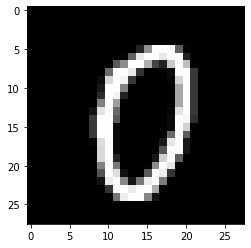

In [3]:
fig, ax = plt.subplots()
_ = ax.imshow(train['image'][1000], cmap = 'gray')

In [4]:
def get_labels(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return labels
train['label'] = get_labels('train-labels-idx1-ubyte.gz')
test['label'] = get_labels('t10k-labels-idx1-ubyte.gz')
print(train['label'].shape, test['label'].shape)

(60000,) (10000,)


In [5]:
# Checking to see if the labels are within the expected values
np.unique(train['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**PART I**

In part one, we will be taking a least-squares binary classifer and creating a classifer for each specific digit [0-9]. We will then test our classifier with the handwritten mnist digit set and count the number of correctly identified hand-written digits using our classifier. We will anaylze its accuracy. 
First, we must partition our data to x and y axis. We will be training our binary classifer with the "training set." 

__We will set up the x and y axis for the training set:__

In [6]:
def transform_images(x):
    x0 = np.zeros((x.shape[0], np.product(x.shape[1:])))
    
    for i in range(x0.shape[0]):
        x0[i] = x[i].flatten()
            
    return np.concatenate([x0, np.ones((x0.shape[0], 1))], axis=1)
    
def transform_labels(y, target):
    y0 = np.zeros((y.shape[0], 1))
    
    for i in range(y0.shape[0]):
        y0[i] = 1 if y[i] == target else -1
    
    return y0


__PART I LEAST SQUARE FUNCTION__

In [7]:
def mnist_least_squares(x, y, target, solver):
    x = transform_images(x)
    y = transform_labels(y, target)
        
    return solver(x, y)
    
def least_squares_solver():
    return lambda x, y: np.matmul(np.linalg.pinv(np.matmul(x.transpose(), x)), np.matmul(x.transpose(), y))


__PART II LEAST SQUARE WITH REGULARIZATION PARAMETER FUNCTION__

In [8]:
def least_squares_with_regularization_solver(lam):
    def solve(x, y):
        xtx = np.matmul(x.transpose(), x)
        
        for i in range(x.shape[1]):
            xtx[i, i] += lam
            
        return np.matmul(np.linalg.pinv(xtx), np.matmul(x.transpose(), y))
    
    return solve

def classify(x, b):
    x = transform_images(x)

    return np.matmul(x, b)

__LEAST SQUARE BINARY CLASSIFIER ON DIGITS 0-9__

In [9]:
# LEAST SQUARES DIGIT 0 
b = mnist_least_squares(train['image'], train['label'], 0, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 0)
np.sum((y_predict == y_expect))/100 # to output percent

98.43

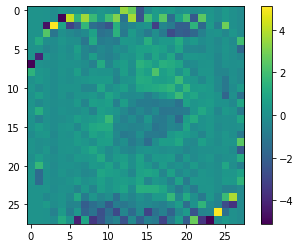

In [10]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [11]:
# LEAST SQUARES DIGIT 1
b = mnist_least_squares(train['image'], train['label'], 1, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 1)
np.sum((y_predict == y_expect))/100

98.34

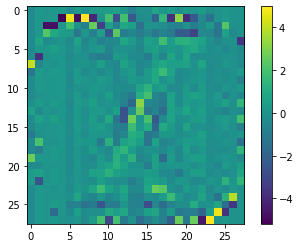

In [12]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [13]:
# LEAST SQUARES DIGIT 2
b = mnist_least_squares(train['image'], train['label'], 2, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 2)
np.sum((y_predict == y_expect))/100

95.84

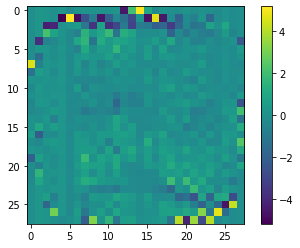

In [14]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [15]:
# LEAST SQUARES DIGIT 3
b = mnist_least_squares(train['image'], train['label'], 3, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 3)
np.sum((y_predict == y_expect))/100

96.02

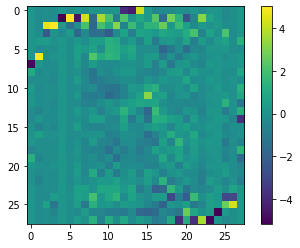

In [16]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [17]:
# LEAST SQUARES DIGIT 4
b = mnist_least_squares(train['image'], train['label'], 4, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 4)
np.sum((y_predict == y_expect))/100

96.65

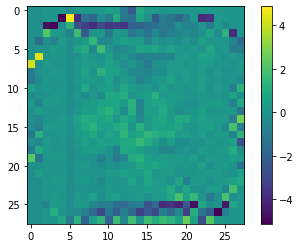

In [18]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [19]:
# LEAST SQUARES DIGIT 5
b = mnist_least_squares(train['image'], train['label'], 5, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 5)
np.sum((y_predict == y_expect))/100

94.64

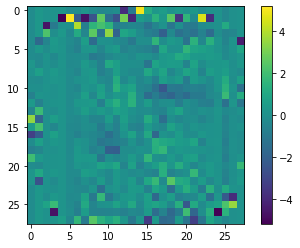

In [20]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [21]:
# LEAST SQUARES DIGIT 6
b = mnist_least_squares(train['image'], train['label'], 6, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 6)
np.sum((y_predict == y_expect))/100

97.4

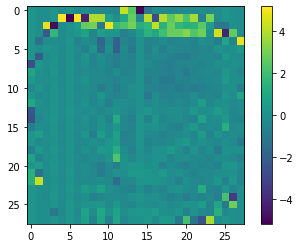

In [22]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [23]:
# LEAST SQUARES DIGIT 7
b = mnist_least_squares(train['image'], train['label'], 7, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 7)
np.sum((y_predict == y_expect))/100

96.46

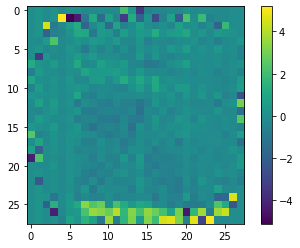

In [24]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [25]:
# LEAST SQUARES DIGIT 8
b = mnist_least_squares(train['image'], train['label'], 8, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 8)
np.sum((y_predict == y_expect))/100

94.9

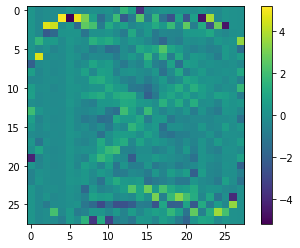

In [26]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [27]:
# LEAST SQUARES DIGIT 9
b = mnist_least_squares(train['image'], train['label'], 9, least_squares_solver())

y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 9)
np.sum((y_predict == y_expect))/100

94.8

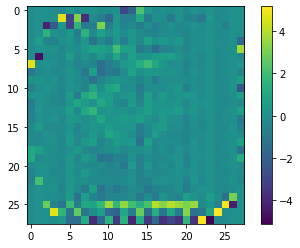

In [28]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

The Results for Part I:
0: 98.43 % 
1: 98.34 %
2: 95.85 %
3: 96.02 % 
4: 96.65 %
5: 94.64 %
6: 97.40 %
7: 96.46 %
8: 94.90 %
9: 84.80 %

**PART II**
For Part II, we will modify the current binary classifier to include  the regularization parameter shown in the instruction pdf. 

__LEAST SQUARES CLASSIFIER WITH REGULARIZATION PARAMETER ON DIGITS 0-9__

In [29]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 0
b = mnist_least_squares(train['image'], train['label'], 0, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 0)
np.sum((y_predict == y_expect))/100

98.49

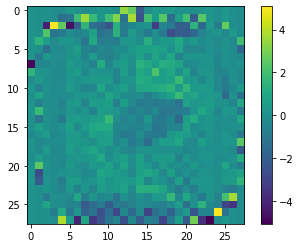

In [30]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [31]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 1
b = mnist_least_squares(train['image'], train['label'], 1, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 1)
np.sum((y_predict == y_expect))/100

98.34

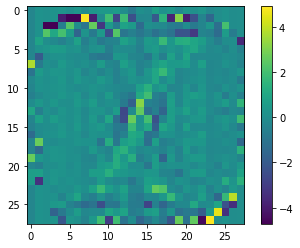

In [32]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [33]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 2
b = mnist_least_squares(train['image'], train['label'], 2, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 2)
np.sum((y_predict == y_expect))/100

95.82

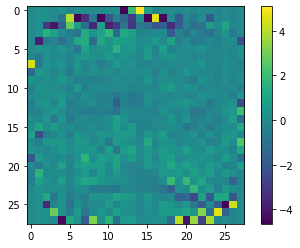

In [34]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [35]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 3
b = mnist_least_squares(train['image'], train['label'], 3, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 3)
np.sum((y_predict == y_expect))/100

96.02

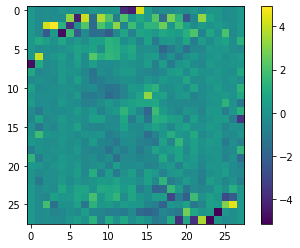

In [36]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [37]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 4
b = mnist_least_squares(train['image'], train['label'], 4, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 4)
np.sum((y_predict == y_expect))/100

96.69

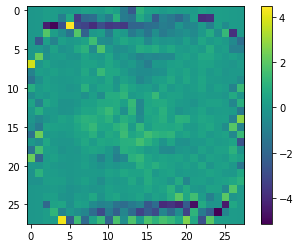

In [38]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [39]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 5
b = mnist_least_squares(train['image'], train['label'], 5, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 5)
np.sum((y_predict == y_expect))/100

94.65

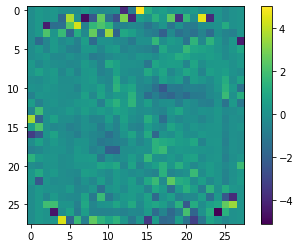

In [40]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [41]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 6
b = mnist_least_squares(train['image'], train['label'], 6, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 6)
np.sum((y_predict == y_expect))/100

97.43

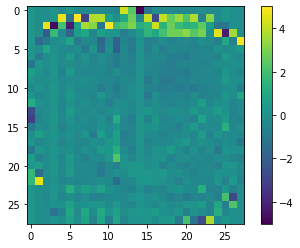

In [42]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [43]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 7
b = mnist_least_squares(train['image'], train['label'], 7, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 7)
np.sum((y_predict == y_expect))/100

96.47

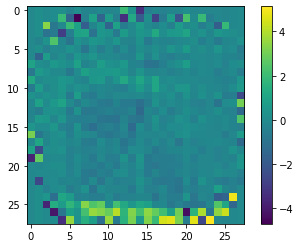

In [44]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [45]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 8
b = mnist_least_squares(train['image'], train['label'], 8, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 8)
np.sum((y_predict == y_expect))/100

94.89

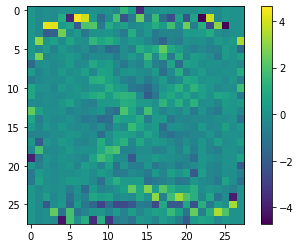

In [46]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [47]:
# LEAST SQUARES WITH REGULARIZATION DIGIT 9
b = mnist_least_squares(train['image'], train['label'], 9, least_squares_with_regularization_solver(100))
y_predict = classify(test['image'], b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 9)
np.sum((y_predict == y_expect))/100

94.81

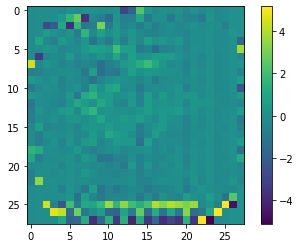

In [48]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

The Results for Part I:
0: 98.43 % 
1: 98.34 %
2: 95.85 %
3: 96.02 % 
4: 96.65 %
5: 94.64 %
6: 97.40 %
7: 96.46 %
8: 94.90 %
9: 84.80 %

Results for Part II:
0: 98.49 %
1: 98.34 %
2: 95.82 %
3: 96.02 %
4: 96.69 %
5: 94.65 %
6: 97.43 %
7: 96.47 %
8: 94.89 %
9: 94.81 %

In comparison to the results using the least squares classifier without regularization, there have been some improvements.
For 6 out of the 10 digits, there were slight improvements. For the other 4 digits, they were either the same or slightly less. 
So, I would say, it slightly improved, but nothing too significant to really say there was great imporvement.

**PART III**
We will compute the 10 largest eigenvalues and corresponding eigenvectors of the covariance matrix for the selected digit k of the "train" data set. We will display the eigenvectors as 28x28 images

In [49]:
from sklearn.preprocessing import StandardScaler
x = transform_images(train['image'])[:, :784]
x = StandardScaler().fit_transform(x)
covarianceMatrix = np.cov(x.transpose())

In [50]:
A, e = np.linalg.eig(covarianceMatrix)
A[:10], e[:10]

eig_pairs = [(np.abs(A[i]), e[:, i]) for i in range(len(A))]

eig_pairs.sort(key = lambda x: x[0], reverse = True)

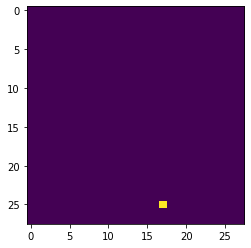

In [51]:
plt.imshow(e[0].reshape((28, 28)))

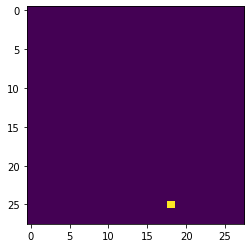

In [52]:
plt.imshow(e[1].reshape((28,28)))

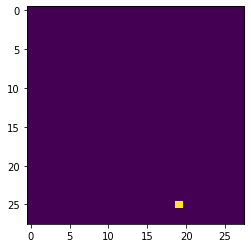

In [53]:
plt.imshow(e[2].reshape((28,28)))

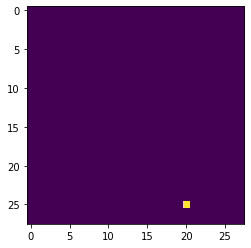

In [54]:
plt.imshow(e[3].reshape((28,28)))

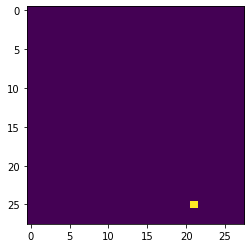

In [55]:
plt.imshow(e[4].reshape((28,28)))

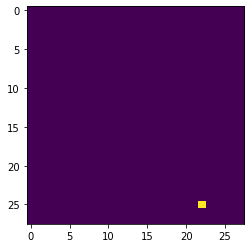

In [56]:
plt.imshow(e[5].reshape((28,28)))

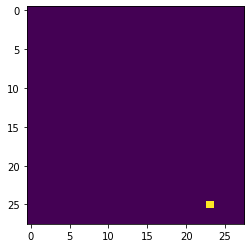

In [57]:
plt.imshow(e[6].reshape((28,28)))

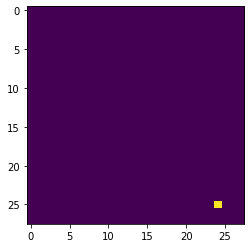

In [58]:
plt.imshow(e[7].reshape((28,28)))

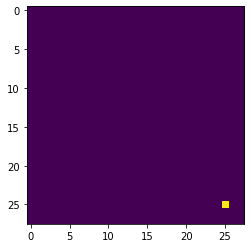

In [59]:
plt.imshow(e[8].reshape((28,28)))

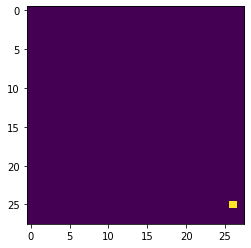

In [60]:
plt.imshow(e[9].reshape((28,28)))

In [61]:
exp_var_percentage = 0.97
tot = sum(A)
var_exp = [(i / tot) * 100 for i in sorted(A, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
    if percentage > exp_var_percentage:
        num_vec_to_keep = index + 1
        break

In [62]:
num_features = x.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))
    
pca_data = x.dot(proj_mat)
pca_data

array([[ 0.92215881],
       [-8.70897698],
       [-2.32838932],
       ...,
       [ 3.77721201],
       [-1.72236917],
       [ 1.42725062]])

**PART IV**
Part IV, we will extend the linear formulation of the Least Squares in Part 1 to a non-linear Least Squares. More details in the instruction pdf.

In [63]:
def nonlinearLS(x0, x, k):
    answer = 1 / (1 + np.exp(-k * (x - x0)))
    return answer

x = nonlinearLS(0, train['image'], 1)

# DIGIT ZERO FOR PART IV

b = mnist_least_squares(x, train['label'], 0, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 0)
np.sum((y_predict == y_expect))

9867

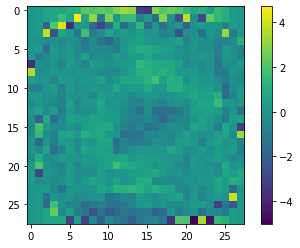

In [64]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [65]:
# DIGIT ONE FOR PART IV

b = mnist_least_squares(x, train['label'], 1, least_squares_solver())

y = nonlinearLS(0, test['image'], 1) 

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 1)
np.sum((y_predict == y_expect))

9847

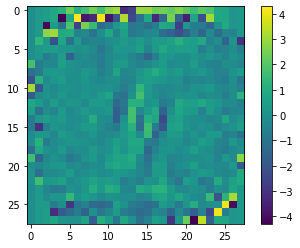

In [66]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [67]:
# DIGIT TWO FOR PART IV
b = mnist_least_squares(x, train['label'], 2, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 2)
np.sum((y_predict == y_expect))

9625

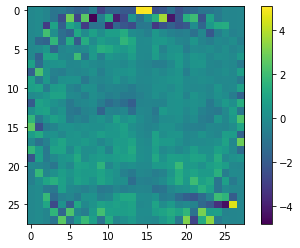

In [68]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [69]:
# DIGIT THREE FOR PART IV
b = mnist_least_squares(x, train['label'], 3, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 3)
np.sum((y_predict == y_expect))

9617

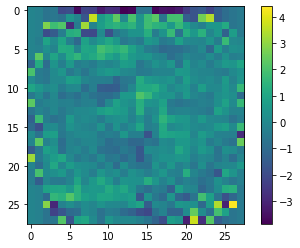

In [70]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [71]:
# DIGIT FOUR FOR PART IV
b = mnist_least_squares(x, train['label'], 4, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 4)
np.sum((y_predict == y_expect))

9697

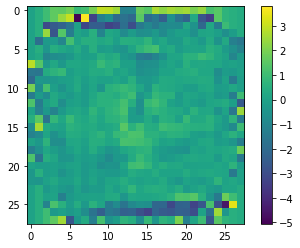

In [72]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [73]:
# DIGIT FIVE FOR PART IV
b = mnist_least_squares(x, train['label'], 5, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 5)
np.sum((y_predict == y_expect))

9472

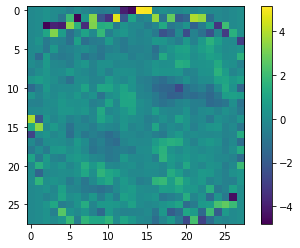

In [74]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [75]:
# DIGIT SIX FOR PART IV
b = mnist_least_squares(x, train['label'], 6, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 6)
np.sum((y_predict == y_expect))

9777

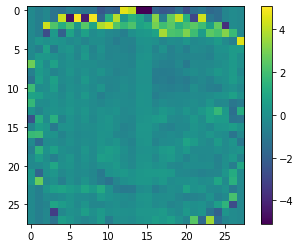

In [76]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [77]:
# DIGIT SEVEN FOR PART IV
b = mnist_least_squares(x, train['label'], 7, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 7)
np.sum((y_predict == y_expect))

9676

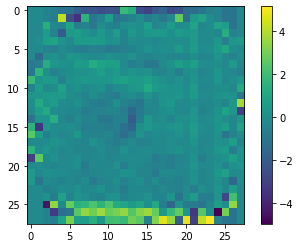

In [78]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [79]:
# DIGIT EIGHT FOR PART IV
b = mnist_least_squares(x, train['label'], 8, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 8)
np.sum((y_predict == y_expect))

9559

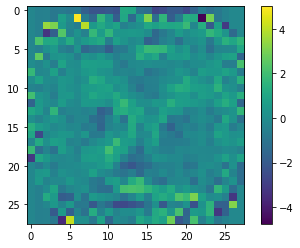

In [80]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

In [81]:
# DIGIT NINE FOR PART IV
b = mnist_least_squares(x, train['label'], 9, least_squares_solver())

y = nonlinearLS(0, test['image'], 1)

y_predict = classify(y, b)
y_predict[y_predict > 0] = 1
y_predict[y_predict < 0] = -1

y_expect = transform_labels(test['label'], 9)
np.sum((y_predict == y_expect))

9559

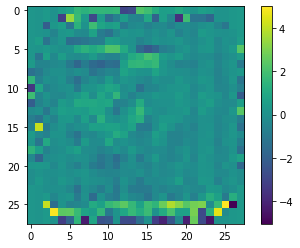

In [82]:
params = b[:784, 0].reshape(28, 28)

from sklearn.preprocessing import StandardScaler
params = StandardScaler().fit_transform(params)
ax = plt.imshow(params)
plt.colorbar(ax)

The Results for Part I:
0: 98.43 % 
1: 98.34 %
2: 95.85 %
3: 96.02 % 
4: 96.65 %
5: 94.64 %
6: 97.40 %
7: 96.46 %
8: 94.90 %
9: 84.80 %

Results for Part II:
0: 98.49 %
1: 98.34 %
2: 95.82 %
3: 96.02 %
4: 96.69 %
5: 94.65 %
6: 97.43 %
7: 96.47 %
8: 94.89 %
9: 94.81 %

Results for PART III:
0: 98.67 %
1: 98.47 %
2: 96.25 %
3: 96.17 %
4: 96.97 %
5: 94.72 %
6: 97.77 %
7: 96.76 %
8: 95.59 %
9: 95.59 %

In comparison to least squares with the regularization parameter and in comparison to the original least squares classifier, this non linear classifier has more significant imporvements for each digit. 